# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('US_Baby_Names.csv')
df.head(5)

Unnamed: 0     Id     Name  Year Gender State  Count
0       11349  11350     Emma  2004      F    AK     62
1       11350  11351  Madison  2004      F    AK     48
2       11351  11352   Hannah  2004      F    AK     46
3       11352  11353    Grace  2004      F    AK     44
4       11353  11354    Emily  2004      F    AK     41

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [6]:
random_data_10row = df.sample(10)
random_data_10row

Unnamed: 0       Id      Name  Year Gender State  Count
50997       309314   309315   Kensley  2014      F    AZ      8
764058     4334021  4334022   Tiffany  2005      F    PA     49
9341         89593    89594   Bryanna  2008      F    AL      5
727349     4049258  4049259    Rayyan  2013      M    OH      5
430627     2367948  2367949  Julianna  2009      F    MD     36
405728     2204916  2204917   Sincere  2014      M    LA     13
948581     5286867  5286868   Marquis  2006      M    VA     16
832184     4691432  4691433  Maddison  2012      F    TN     17
954234     5292520  5292521     Lewis  2011      M    VA     11
726538     4048447  4048448     Roger  2013      M    OH     18

### 03. Cho biết kích thước dữ liệu

In [7]:
df.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [9]:
df_drop = df.drop(columns=['Unnamed: 0','Id'])
df.drop

<bound method DataFrame.drop of          Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]>

### 05. Cho biết số lượng bé trai, bé gái?

In [8]:
soGioiTinh = df['Gender'].value_counts()
soGioiTinh

F    558846
M    457549
Name: Gender, dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [12]:
name_count = df['Name'].unique()
name_different = name_count.size
print(f'có {name_different} tên khác nhau')

có 17632 tên khác nhau


### 07. Tên nào xuất hiện ít nhất?

In [14]:
name_list = df['Name'].value_counts()
min_name = name_list[name_list==1]
print('tên ít xuất hiện nhất: ',min_name)

tên ít xuất hiện nhất:  Name
Grettell    1
Dawsen      1
Abenezer    1
Greenley    1
Daiden      1
           ..
Terryn      1
Yanna       1
Zemirah     1
Emmilyn     1
Coalton     1
Name: count, Length: 3682, dtype: int64


### 08. Top 10 tên được sử dụng nhiều nhất?

In [16]:
name_list.head(10)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Angel      962
Name: Name, dtype: int64

## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

<Axes: xlabel='Name'>

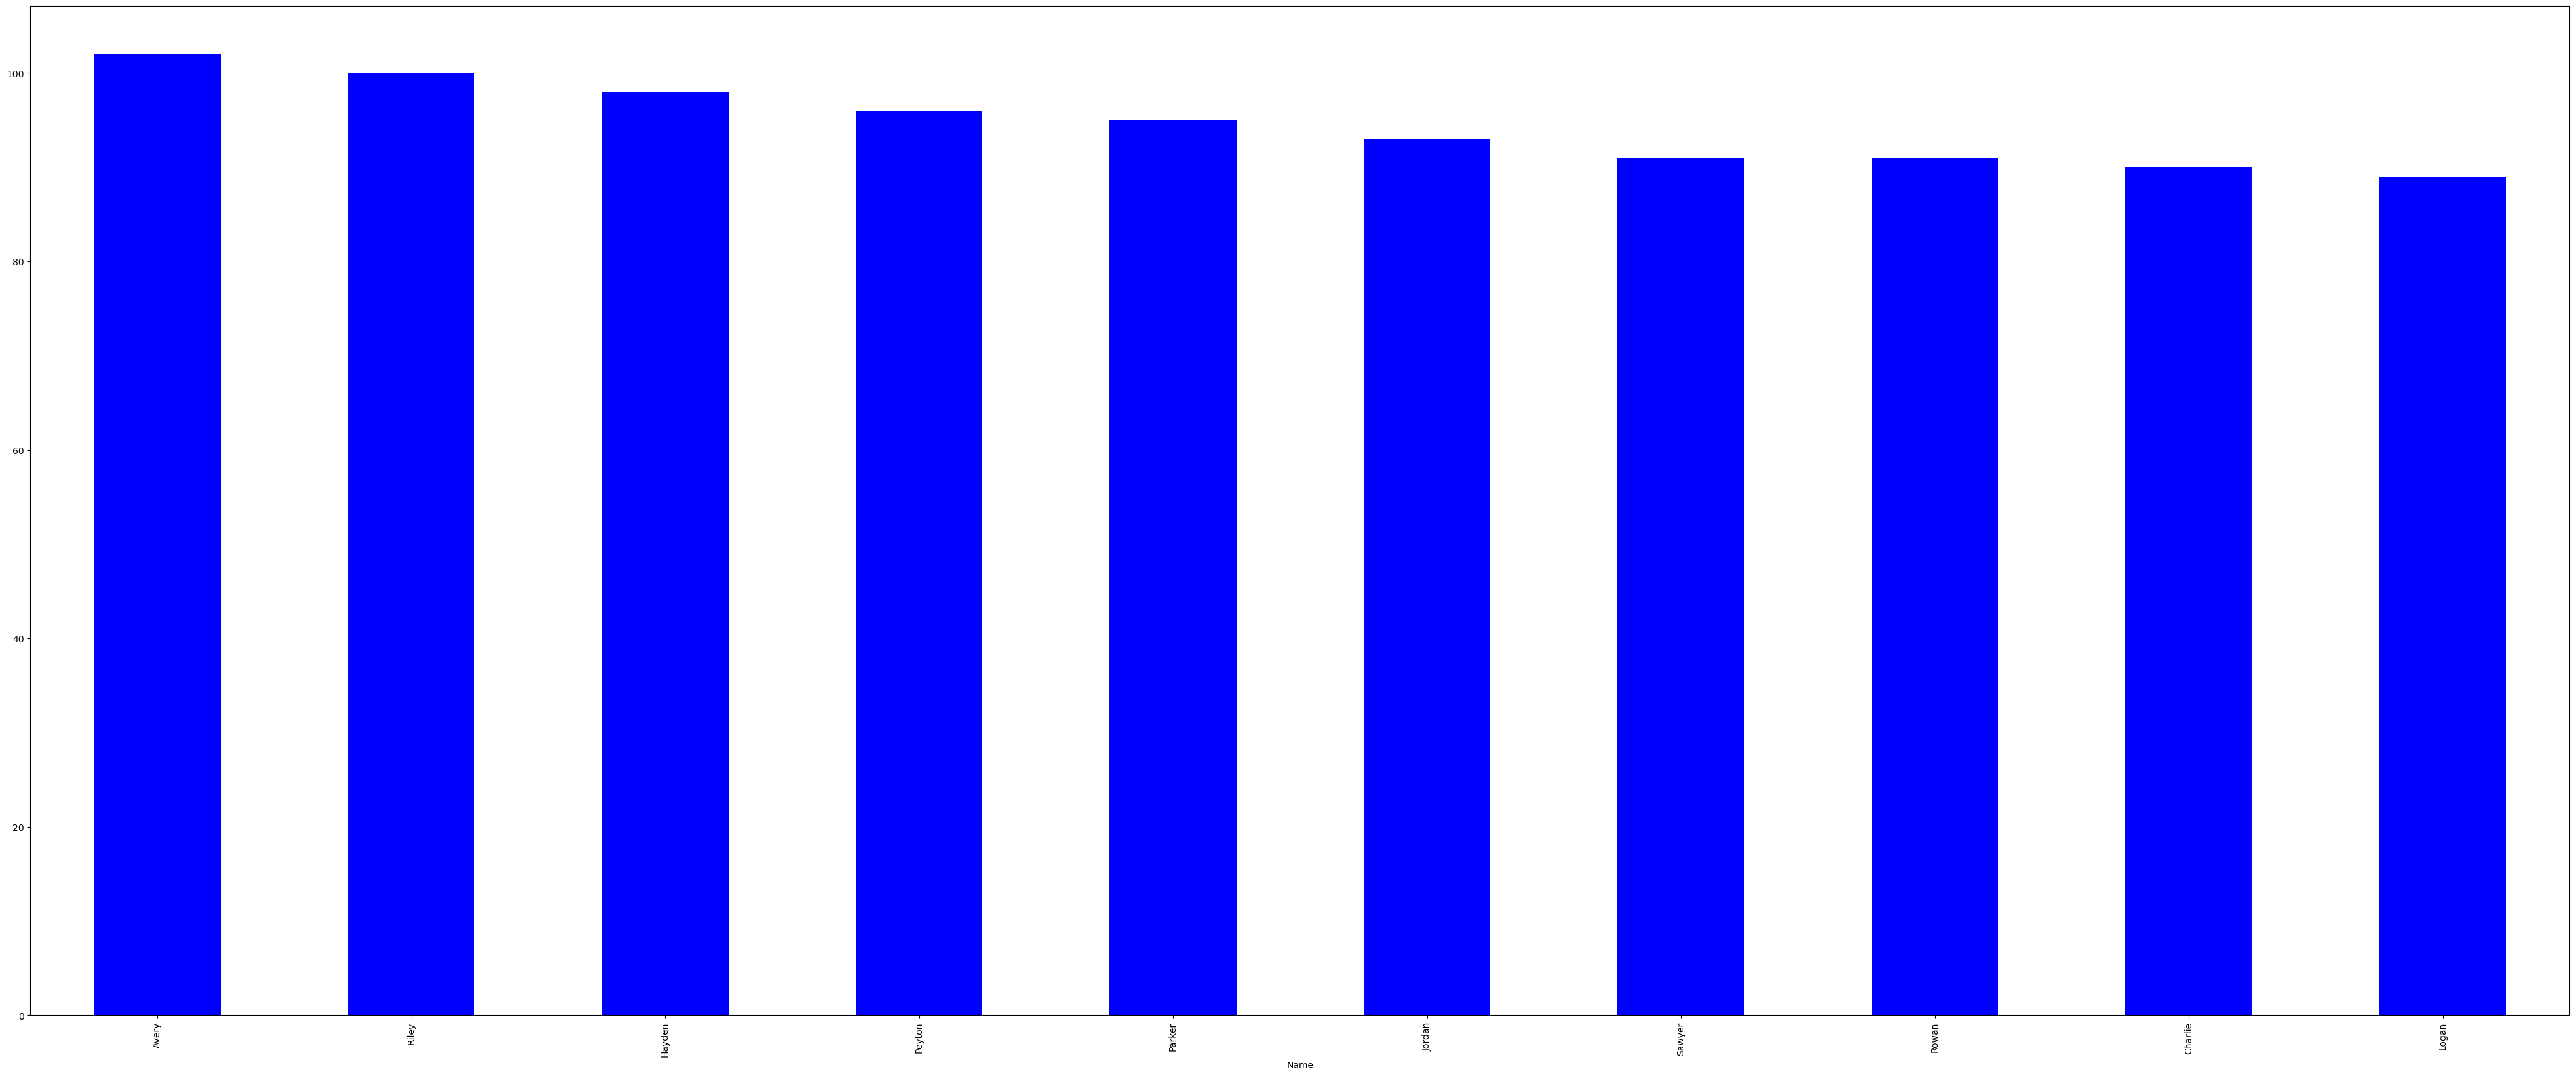

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

data_2014 = df[df['Year'] == 2014 ]
name_2014 = data_2014['Name'].value_counts()
name_2014_top10 = name_2014.head(10)
plt.figure(figsize=(50,20))
name_2014_top10.plot(kind='bar',color = 'b')



### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

In [18]:
data_2004to2014 = df[df['Year'].between(2004,2014)]
tong_GioiTinh_tungNam = data_2004to2014.groupby(['Year','Gender']).size().unstack()
tiLe_gioiTinh_tungNam = tong_GioiTinh_tungNam.div(tong_GioiTinh_tungNam.sum(axis =1),axis = 0) *100
tiLe_gioiTinh_tungNam

Gender          F          M
Year                        
2004    55.638741  44.361259
2005    55.592470  44.407530
2006    55.391436  44.608564
2007    55.372514  44.627486
2008    55.352216  44.647784
2009    54.949318  45.050682
2010    54.748304  45.251696
2011    54.731212  45.268788
2012    54.525714  45.474286
2013    54.386854  45.613146
2014    54.201895  45.798105

<Figure size 7200x360 with 0 Axes>

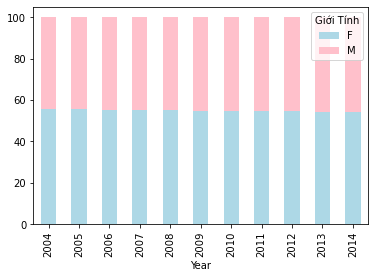

In [54]:
plt.figure(figsize=(100,5))
tiLe_gioiTinh_tungNam.plot(kind = 'bar',stacked = True, color = ['lightblue','pink'])
plt.legend(title='Giới Tính')
